<a href="https://colab.research.google.com/github/Rahma-Nafisa/Scraping-data-dari-aplikasi-Duolingo/blob/main/Analisis_Sentiment_Duolingo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper
!pip install snscrape

from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd


df = pd.read_csv('ulasan_aplikasi.csv')

print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

df = pd.read_csv('ulasan_aplikasi.csv')
df = df[['content']].dropna()


def cleaningText(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['text_clean'] = df['content'].apply(cleaningText)


slangwords = {
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "tdk": "tidak",
    "bgt": "banget", "dr": "dari", "dgn": "dengan", "tp": "tapi",
    "udh": "sudah", "blm": "belum", "trs": "terus", "jg": "juga"
}

def fix_slangwords(text):
    return ' '.join([slangwords.get(word, word) for word in text.split()])

df['text_slang'] = df['text_clean'].apply(fix_slangwords)


def tokenizingText(text):
    return text.split()

df['text_tokens'] = df['text_slang'].apply(tokenizingText)


stop_words = set(stopwords.words('indonesian'))

def filteringText(words):
    return [word for word in words if word not in stop_words]

df['text_stopwords'] = df['text_tokens'].apply(filteringText)


def toSentence(words):
    return ' '.join(words)

df['text_final'] = df['text_stopwords'].apply(toSentence)


print(df[['content', 'text_final']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             content  \
0  aplikasi yg sangat bagus untuk para anak2 atau...   
1  terimakasih banget sama aplikasi ini, selain m...   
2  Baguss banget Aplikasinya ✨️🔥 sangat membantu ...   
3  sangatt bagusss woyyy, udah lama main sihh dan...   
4  untuk aplikasi nya seruu dan muda untuk di pah...   

                                          text_final  
0  aplikasi yg bagus anak remaja yg bosen ngapain...  
1  terimakasih banget aplikasi menambah ahlian ba...  
2  baguss banget aplikasinya membantu mengasah sk...  
3  sangatt bagusss woyyy udah main sihh alhamduli...  
4  aplikasi nya seruu muda pahami yaa pengisian c...  


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    return stemmer.stem(text)


df['text_stemmed'] = df['text_final'].apply(stemmingText)


print(df[['content', 'text_final', 'text_stemmed']].head())

                                             content  \
0  aplikasi yg sangat bagus untuk para anak2 atau...   
1  terimakasih banget sama aplikasi ini, selain m...   
2  Baguss banget Aplikasinya ✨️🔥 sangat membantu ...   
3  sangatt bagusss woyyy, udah lama main sihh dan...   
4  untuk aplikasi nya seruu dan muda untuk di pah...   

                                          text_final  \
0  aplikasi yg bagus anak remaja yg bosen ngapain...   
1  terimakasih banget aplikasi menambah ahlian ba...   
2  baguss banget aplikasinya membantu mengasah sk...   
3  sangatt bagusss woyyy udah main sihh alhamduli...   
4  aplikasi nya seruu muda pahami yaa pengisian c...   

                                        text_stemmed  
0  aplikasi yg bagus anak remaja yg bosen ngapain...  
1  terimakasih banget aplikasi tambah ahli bahasa...  
2  baguss banget aplikasi bantu asah skill bahasa...  
3  sangatt bagusss woyyy udah main sihh alhamduli...  
4  aplikasi nya seruu muda paham yaa isi cuore ny..

In [ ]:
positive_words = {
    'bagus', 'baik', 'mantap', 'suka', 'cepat', 'puas', 'lancar', 'mudah',
    'keren', 'mantul', 'top', 'rekomendasi', 'senang', 'cocok', 'berhasil'
}
negative_words = {
    'buruk', 'jelek', 'lama', 'error', 'parah', 'lemot', 'kecewa', 'susah',
    'gagal', 'crash', 'keluar', 'hang', 'payah', 'benci', 'ribet'
}

# Fungsi analisis sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text.split():
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    if score > 0:
        label = 'positif'
    elif score < 0:
        label = 'negatif'
    else:
        label = 'netral'
    return score, label

In [ ]:
results = df['text_final'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]



In [ ]:
print(df[['content', 'text_stemmed', 'polarity_score', 'polarity']].head(10))

                                             content  \
0  aplikasi yg sangat bagus untuk para anak2 atau...   
1  terimakasih banget sama aplikasi ini, selain m...   
2  Baguss banget Aplikasinya ✨️🔥 sangat membantu ...   
3  sangatt bagusss woyyy, udah lama main sihh dan...   
4  untuk aplikasi nya seruu dan muda untuk di pah...   
5  Aplikasi keren saya banyak belajar lewat aplik...   
6  Suka bgtt sma Duolingo ini, belajar jdi lebih ...   
7  Sejauh 2 tahun saya pakai emang apk nya bagus ...   
8  Untuk aplikasi nya sangat bagus, metode pelaja...   
9  sebelumnya cukup sulit untuk mengumpulkan 5 He...   

                                        text_stemmed  polarity_score polarity  
0  aplikasi yg bagus anak remaja yg bosen ngapain...               2  positif  
1  terimakasih banget aplikasi tambah ahli bahasa...               1  positif  
2  baguss banget aplikasi bantu asah skill bahasa...               0   netral  
3  sangatt bagusss woyyy udah main sihh alhamduli...           

In [ ]:
X = df['text_stemmed']
y = df['polarity']

In [ ]:
from sklearn.model_selection import train_test_split

# 80/20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 70/30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 60/40
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
print("Distribusi label skema 80/20:\n", y_train_80.value_counts(normalize=True))
print("\nDistribusi label skema 70/30:\n", y_train_70.value_counts(normalize=True))
print("\nDistribusi label skema 60/40:\n", y_train_60.value_counts(normalize=True))

Distribusi label skema 80/20:
 polarity
positif    0.614167
netral     0.368889
negatif    0.016944
Name: proportion, dtype: float64

Distribusi label skema 70/30:
 polarity
positif    0.614286
netral     0.368889
negatif    0.016825
Name: proportion, dtype: float64

Distribusi label skema 60/40:
 polarity
positif    0.614074
netral     0.368889
negatif    0.017037
Name: proportion, dtype: float64


In [ ]:
data_splits = {
    '80_20': (X_train_80, X_test_20, y_train_80, y_test_20),
    '70_30': (X_train_70, X_test_30, y_train_70, y_test_30),
    '60_40': (X_train_60, X_test_40, y_train_60, y_test_40)
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate(model, split_key, model_name='Model'):
    X_train, X_test, y_train, y_test = data_splits[split_key]

    # Pipeline TF-IDF + Model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('clf', model)
    ])

    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    print(f"\n=== Evaluasi untuk {model_name} ({split_key}) ===")
    print(classification_report(y_test, y_pred))
    print(f"\nAkurasi: {accuracy_score(y_test, y_pred):.4f}")


    cm = confusion_matrix(y_test, y_pred, labels=['positif', 'netral', 'negatif'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positif', 'netral', 'negatif'],yticklabels=['positif', 'netral', 'negatif'], cmap="Blues")
    plt.title(f"Confusion Matrix {model_name} ({split_key})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return pipeline



=== Evaluasi untuk SVM (80_20) ===
              precision    recall  f1-score   support

     negatif       1.00      0.07      0.12        15
      netral       0.90      0.94      0.92       332
     positif       0.96      0.96      0.96       553

    accuracy                           0.94       900
   macro avg       0.96      0.66      0.67       900
weighted avg       0.94      0.94      0.93       900


Akurasi: 0.9400


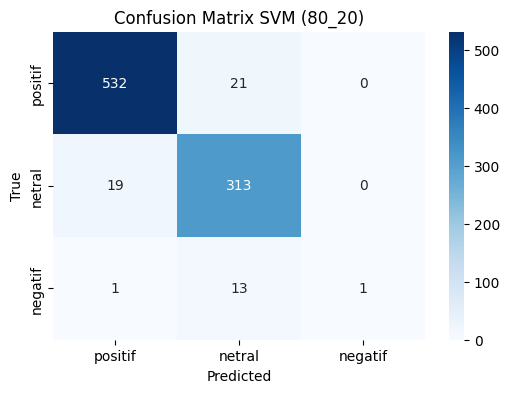


=== Evaluasi untuk Random Forest (70_30) ===
              precision    recall  f1-score   support

     negatif       1.00      0.04      0.08        23
      netral       0.91      0.94      0.92       498
     positif       0.96      0.97      0.97       829

    accuracy                           0.94      1350
   macro avg       0.96      0.65      0.66      1350
weighted avg       0.94      0.94      0.94      1350


Akurasi: 0.9422


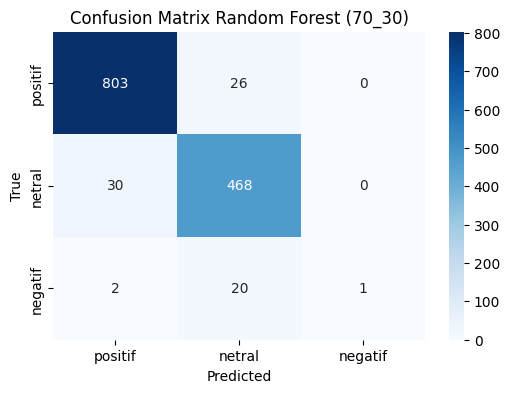


=== Evaluasi untuk SVM 60/40 (60_40) ===
              precision    recall  f1-score   support

     negatif       1.00      0.03      0.06        30
      netral       0.87      0.94      0.90       664
     positif       0.96      0.94      0.95      1106

    accuracy                           0.93      1800
   macro avg       0.94      0.64      0.64      1800
weighted avg       0.93      0.93      0.92      1800


Akurasi: 0.9250


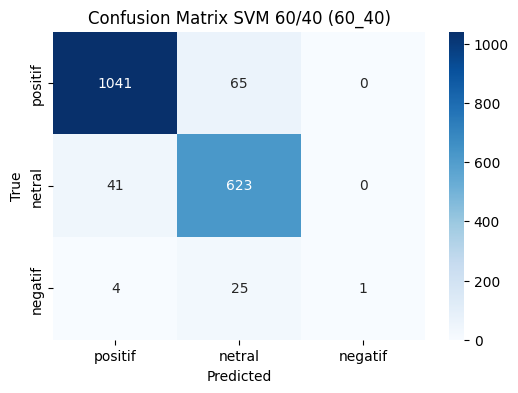

In [ ]:
# Skema 1: Tf-IDF + SVM (80/20)
svm_model_80 = train_and_evaluate(SVC(kernel='linear'), '80_20', 'SVM')

# Skema 2: Tf-IDF + RF (70/30)
rf_model_70 = train_and_evaluate(RandomForestClassifier(n_estimators=100), '70_30', 'Random Forest')

# Skema 3: Tf-IDF + SVM (60/40)
svm_model_60 = train_and_evaluate(SVC(kernel='linear'), '60_40', 'SVM 60/40')


=== Evaluasi untuk SVM (80_20) ===
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        15
      netral       0.86      0.93      0.89       332
     positif       0.95      0.94      0.95       553

    accuracy                           0.92       900
   macro avg       0.61      0.62      0.61       900
weighted avg       0.90      0.92      0.91       900


Akurasi: 0.9178


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


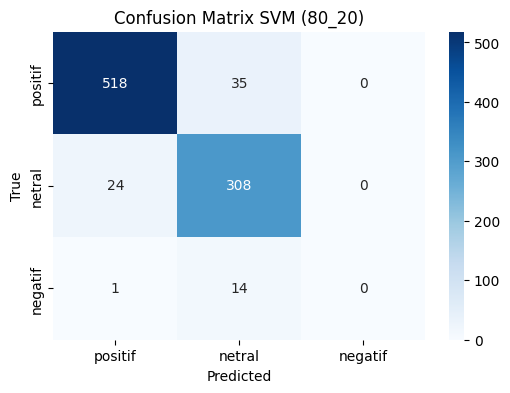

Prediksi: ['positif']


In [ ]:
pipeline = train_and_evaluate(SVC(), '80_20', 'SVM')

# Sample untuk prediksi
sample = ["aplikasinya bagus banget dan bermanfaat"]

prediction = pipeline.predict(sample)

print("Prediksi:", prediction)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

le = LabelEncoder()
y = le.fit_transform(df['polarity'])
num_classes = len(le.classes_)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_stemmed'])

sequences = tokenizer.texts_to_sequences(df['text_stemmed'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

y_cat = to_categorical(y)

from sklearn.model_selection import train_test_split

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    padded_sequences, y_cat, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train_dl, y_train_dl,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_dl, y_test_dl)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.5697 - loss: 0.8861 - val_accuracy: 0.6144 - val_loss: 0.7370
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.6192 - loss: 0.7410 - val_accuracy: 0.6144 - val_loss: 0.7385
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.6060 - loss: 0.7554 - val_accuracy: 0.6144 - val_loss: 0.7394
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.6007 - loss: 0.7568 - val_accuracy: 0.6144 - val_loss: 0.7391
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.6244 - loss: 0.7410 - val_accuracy: 0.6144 - val_loss: 0.7355
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.6007 - loss: 0.7505 - val_accuracy: 0.6144 - val_loss: 0.7356
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.6061 - loss: 0.7441 - val_accuracy: 0.6144 - val_loss: 0.7360
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.6192 - loss: 0.7538 - val_accuracy: 0.6144 

In [ ]:
y_pred_dl = model.predict(X_test_dl)
y_pred_labels = y_pred_dl.argmax(axis=1)
y_true_labels = y_test_dl.argmax(axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))
print("Akurasi =", accuracy_score(y_true_labels, y_pred_labels))


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        15
      netral       0.00      0.00      0.00       332
     positif       0.61      1.00      0.76       553

    accuracy                           0.61       900
   macro avg       0.20      0.33      0.25       900
weighted avg       0.38      0.61      0.47       900

Akurasi = 0.6144444444444445


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
